# Exercises: Data Analysis with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Fit with Trial & Error
In this exercise we simulate a simple linear fit algorithm. The idea is to vary the slope and find the value that corresponds to the _least square_.

First, we create some fictional data. The y-values linearly depend on x, but with a random perturbation.

In [2]:
n_points = 10
slope = 2
noise = 1

x = np.arange(n_points)
y = slope * x + noise * np.random.rand(n_points)

Make a graph of y vs. x.

Text(0, 0.5, 'y')

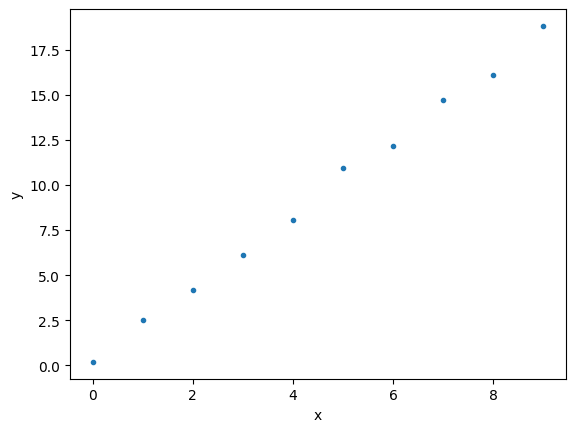

In [3]:
plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('y')

Now we assume that we do not know the "exact" slope, but we can estimate it to be between 1 and 2.

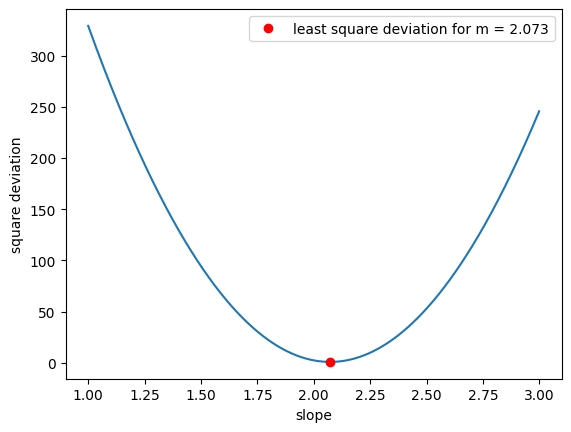

In [29]:
def sq_dev(x, y, m):
    diff = y - m * x
    sq = diff ** 2
    return np.sum(sq)

m_min = 1
m_max = 3

step = 0.001
trials = np.arange(m_min, m_max, step)

lsq = np.array([sq_dev(x, y, t) for t in trials])

min_index = np.argmin(lsq)
opt = trials[min_index]

plt.plot(trials, lsq, '-')
plt.plot(opt, lsq[min_index], 'ro', label=f'least square deviation for m = {opt:.3f}')
plt.xlabel('slope')
plt.ylabel('square deviation')
plt.legend()

Compare the result to the values obtained with a built-in fit function.

In [30]:
from scipy.optimize import curve_fit

def f(x, m):
    return m * x
    
coeff, pcov = curve_fit(f, x, y)
m = coeff[0]

print(f'Best slope according to scipy.curve_fit: m = {m:.3f}')

Best slope according to scipy.curve_fit: m = 2.073


As long as the steps for the guess are small enough, the result of the (more efficient) curve_fit can be reproduced.